# Matrix Multiplicatiton, Eigenvectors/values, Gradients/Hessians, Matrix Definiteness, Etc. and some Linear Algebra flashcards

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Vector

In [174]:
X = np.array([[2],[.5]])
X

array([[2. ],
       [0.5]])

## Transformation
- rotation
- symmetric matrices (trick)

In [219]:
C = np.array([[-0.5,1.5],[1,1]])
# https://en.wikipedia.org/wiki/Rotation_matrix
# non semetric matrices usually have complex eigenvectors
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html
C = (C+C.T)/2
C

array([[-0.5 ,  1.25],
       [ 1.25,  1.  ]])

### Matrix Multiplication (Transformed Vector X)

In [220]:
C @ X

array([[-0.375],
       [ 3.   ]])

(-3.0, 3.0)

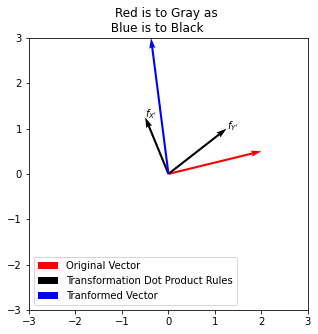

In [247]:
fig = plt.figure(figsize=(5,5))

plt.quiver([0],[0], X[0,:], X[1,:], 
           angles='xy', scale_units='xy', scale=1, color='r', label='Original Vector')

plt.quiver(0*C[:,0], 0*C[:,1], C[0,:], C[1,:], 
           angles='xy', scale_units='xy', scale=1, label='Transformation Dot Product Rules')

plt.text(C[0,0],C[0,1],"$f_{X'}$")
plt.text(C[1,0],C[1,1],"$f_{Y'}$")

plt.quiver([0],[0], (C@X)[0,:], (C@X)[1,:], 
           angles='xy', scale_units='xy', scale=1, color='blue', label='Tranformed Vector')


plt.legend(loc='lower left')
plt.title('Red is to Gray as \n Blue is to Black       ')

plt.xlim(-3, 3)
plt.ylim(-3, 3)


$\Large \vec x \cdot \vec y = ||\vec x|| \cdot ||\vec y|| \cdot cos(\theta_{\vec x \vec y})$

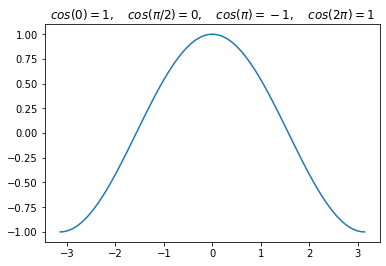

In [217]:
theta = np.linspace(-np.pi,np.pi,100)
plt.plot(theta, np.cos(theta))
_=plt.title("$cos(0)=1, \quad cos(\pi/2)=0, \quad cos(\pi)=-1, \quad cos(2\pi)=1$")


## Eigenvalues/Vectors

In [249]:
eigval,eigvec = np.linalg.eig(C)

(-3.0, 3.0)

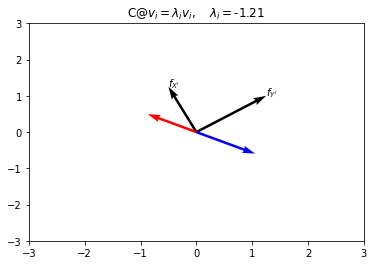

In [277]:
ev_i = 0

plt.quiver(0*C[:,0], 0*C[:,1], C[0,:], C[1,:], 
           angles='xy', scale_units='xy', scale=1, label='Transformation Dot Product Rules')

plt.text(C[0,0],C[0,1],"$f_{X'}$")
plt.text(C[1,0],C[1,1],"$f_{Y'}$")

plt.quiver([0],[0], (C@eigvec[:,[ev_i]])[0,:], (C@eigvec[:,[ev_i]])[1,:], 
           angles='xy', scale_units='xy', scale=1, color='blue', label='Transformed Vector')

plt.quiver([0],[0], eigvec[0,ev_i], eigvec[1,ev_i], 
           angles='xy', scale_units='xy', scale=1, color='r', label='Original Vector')

plt.title("C@$v_i = \lambda_i v_i, \quad \lambda_i = $"+str(np.round(eigval[ev_i],2)))


plt.xlim(-3, 3)
plt.ylim(-3, 3)



## Condition Numbers

If $\underset{i,j}{max} \frac{\lambda_i}{\lambda_j}$ then `C@X` is "extremely unstable"
- small changes in `X` mean large changes in `C@X`

## Gradient $\nabla_{\boldsymbol{\theta}} f_{\boldsymbol{\theta}}(\textbf{x})$ and Hessian $\mathbf{H}_{\boldsymbol{\theta}} f_{\boldsymbol{\theta}}(\textbf{x})$

$
\begin{array}{ccc}
\nabla_{\boldsymbol{\theta}} f_{\boldsymbol{\theta}}(\textbf{x}) = \left[ 
\begin{array}{c}
\frac{\partial}{\partial \theta_1} f_{\boldsymbol{\theta}}(\mathbf{x})\\
\frac{\partial}{\partial \theta_2} f_{\boldsymbol{\theta}}(\mathbf{x})\\
\vdots\\
\frac{\partial}{\partial \theta_j} f_{\boldsymbol{\theta}}(\mathbf{x})\\
\vdots\\
\frac{\partial}{\partial \theta_p} f_{\boldsymbol{\theta}}(\mathbf{x})\\
\end{array}
\right]
& and &
\mathbf{H}_{\boldsymbol{\theta}} f_{\boldsymbol{\theta}}(\textbf{x}) = \left[ 
\begin{array}{cccc}
\frac{\partial^2}{\partial \theta_1\partial \theta_1} f_{\boldsymbol{\theta}}(\mathbf{x}) &
\frac{\partial^2}{\partial \theta_1\partial \theta_2} f_{\boldsymbol{\theta}}(\mathbf{x}) &\cdots&
\frac{\partial^2}{\partial \theta_1\partial \theta_p} f_{\boldsymbol{\theta}}(\mathbf{x})\\
\frac{\partial^2}{\partial \theta_2\partial \theta_1} f_{\boldsymbol{\theta}}(\mathbf{x}) &
\frac{\partial^2}{\partial \theta_2\partial \theta_2} f_{\boldsymbol{\theta}}(\mathbf{x}) &\cdots&
\frac{\partial^2}{\partial \theta_2\partial \theta_p} f_{\boldsymbol{\theta}}(\mathbf{x})\\
\vdots & \vdots &\ddots& \vdots\\
\frac{\partial^2}{\partial \theta_j\partial \theta_1} f_{\boldsymbol{\theta}}(\mathbf{x}) &
\frac{\partial^2}{\partial \theta_j\partial \theta_2} f_{\boldsymbol{\theta}}(\mathbf{x}) &\cdots&
\frac{\partial^2}{\partial \theta_j\partial \theta_p} f_{\boldsymbol{\theta}}(\mathbf{x})\\
\vdots & \vdots &\ddots& \vdots\\
\frac{\partial^2}{\partial \theta_p\partial \theta_1} f_{\boldsymbol{\theta}}(\mathbf{x}) &
\frac{\partial^2}{\partial \theta_p\partial \theta_2} f_{\boldsymbol{\theta}}(\mathbf{x}) &\cdots&
\frac{\partial^2}{\partial \theta_p\partial \theta_2} f_{\boldsymbol{\theta}}(\mathbf{x})\\
\end{array}
\right]
\end{array}$


## Definiteness

*Positive Definite Matrix*: 
- Symmetric matrix eigenvalues are *all* positive: $\lambda_i > 0$
- $X^T C X <0 $ for all $X$ (`X.T @ C @ X > 0`)



*Negative Definite Matrix*: 
- Symmetric matrix eigenvalues are *all* negative: $\lambda_i < 0$
- $X^T C X <0 $ for all $X$ (`X.T @ C @ X < 0`)



## Critical Points (of a function)

If $\nabla_{\boldsymbol{\theta}} f_{\boldsymbol{\theta}}(\textbf{x}) = 0$ at $\boldsymbol{\theta}_0$, then $\boldsymbol{\theta}_0$ is a

- *local minimum[maximum]* if $\mathbf{H}_{\boldsymbol{\theta}} f_{\boldsymbol{\theta}}(\textbf{x})$ is positive[negative] definite at $\boldsymbol{\theta}_0$
    - (note that "*minimum*" matches with "*positive*" while "maximum" matches with "negative")
- otherwise $\boldsymbol{\theta}_0$ may be a saddle point
    - can't tell if $\lambda_i=0$ for some $i$


### Proof

Second order Taylor series expansion of $f_{\boldsymbol{\theta}}(\textbf{x})$ at $\boldsymbol{\theta}_0$:

$f_{\boldsymbol{\theta}}(\textbf{x}) \approx \underset{\text{at}\;\boldsymbol{\theta}_0}{f_{\boldsymbol{\theta}}(\textbf{x})} + 
(\boldsymbol{\theta} - \boldsymbol{\theta}_0) \cdot
\underset{\text{at}\;\boldsymbol{\theta}_0} {\nabla_{\boldsymbol{\theta}} f_{\boldsymbol{\theta}}(\textbf{x})} 
+ \frac{1}{2}(\boldsymbol{\theta} - \boldsymbol{\theta}_0)^T \cdot
\underset{\text{at}\;\boldsymbol{\theta}_0}
{\mathbf{H}_{\boldsymbol{\theta}} f_{\boldsymbol{\theta}}(\textbf{x})}
\cdot (\boldsymbol{\theta} - \boldsymbol{\theta}_0)$

At $\boldsymbol{\theta}_0$ a local minimum[maximum]
- the middle term goes to 0
- the quadratic term must be positive[negative] for any $\boldsymbol{\theta} = \boldsymbol{\theta}_0 + \epsilon$ for some small $\epsilon$


## In addition to the above

## here are the things you should have understood from your reading
- How softmax can correct for under/overflow
- How Hill Climbing works
    - that step size is an issue
    - that the step size issue can be analyzed, to some degree, using the Hession
- That thee Jacobian is a thing
- If you have a quadratic function, Newton's method can optimize it in one step
    - and if you have an approximately quadratic function, Newton's method (if used carefully) could optimize it quickly with a few iterations
- That constrained optimization started off based on 
    - the Lagrangian
    - and is now based on the KKT approach
        - and this can be used in, e.g.,
            - ridge/lasso regularization
            - SVM optimization
- $L_p$ norms, unit vectors (could be \emph{orthonormal} if they're also \emph{orthogonal})
    - Frobenius norm $\sqrt{Tr(AA^T)}$
- $x^Ty = ||x|| \cdot ||y|| \cdot cos(\theta)$
    - $=0$ if $\theta=\pi/2$... i.e., $x$ and $y$ are \emph{orthogonal}
        - a square matrix with mutually \emph{orthonormal} rows and mutually \emph{orthonormal} columns is called an \emph{orthogonal} matrix and $A^TA=AA^T=I$ and $A^T=A^-1$
- PCA

## And here are some Linear Algebra notes that you should be comfortable reading

- $(AB)^T = B^TA^T, \quad (x^Ty) = (x^Ty)^T = y^Tx$
- $A^T=A$ means $A$ is symmetric
- $A^{-1}A = I \;(= AA^{-1} \; \text{if $A$ is square... otherwise left and right inverses might exist and could be used})$
    - $(X^TX)^{-1}X^T y = \hat \beta$
    - $X\hat\beta = \hat y$
    - $X(X^TX)^{-1}X^T y = \hat y$
    - $H y = \hat y$
- $y = H^{-1}\hat y$
    - $H^{-1}$?
    - $(X^TX)^{-1}$?
- $A^{-1}$ of $A$ exists if 
    - $b$ and $x$ form a bijective 1:1 mapping in $Ax = b$ 
        - otherwise, if different $x_i$ map to the same $b$, then a single $b$ maps back to multiple $x_i$ in "$x = A^{-1}b$"
        - which is not possible for the function $A^{-1}$, so the inverse of $A$ cannot exist: the function $A$ is not invertable
    - Certainly *it could* be possible for multiple distinct $x_i$ to map to the same $b$ for some choices of $A$... e.g., $A=\textbf{0}$
        - but then that $A$ is not invertible.
    - If $x_i$ and $x_j$ are solutions to $Ax = b$ then so is $x_k = \alpha x_i + (1-\alpha) x_j$ for any real $\alpha$
    - It's *also* the case that **no** solutions exist to $Ax = b$
        - this would be the case if $b$ was not in the span of the column vectors of $A$
            - i.e., $x$ specifies the weighted average of the columns of $A$
                - if $b$ can't be made in this manner then it's not in the column space (also called the range) of $A$.              
- If the columns of square (m by m) matrix $A$ are linearly independent
    - (linearly independent: cannot be constructed from each other)
- then $A$ is called non-singular, and $A^-1$ exists. 
    - Solutions $x$ to $Ax = b$ can exist for non-square or singular (i.e., non-invertible) matrices... but you won't be able to use $A^{-1}$ to find them, since 
- Eigen decomposition of $A$ is $V \textbf{diag}(\boldsymbol{\lambda}) V^-1$ where the columns of $V$ are linearly independent eigenvectors of $A$ with corresponding eigenvalues $\boldsymbol{\lambda}$
    - eigen decompositions can involve imaginary numbers
    - symmetric, real-valued matrices decompose as $Q \textbf{diag}(\boldsymbol{\lambda}) Q^T$ where $Q$ is real valued and orthogonal
    - this eigen decomposition is unique if all eigenvalues are unique
    - A is singular iff (if and only if) any eigenvalue is 0.
        - $x^T A x$ for $||x||=1$ is maximally the largest eigenvalue and minimally the smallest.
    - All eigenvalues positive[negative] means positive[negative] definite: $x^T A x [>/<] 0$  
        - some 0's mean semi-definite: $x^T A x [\geq/\leq] 0$
- A real matrices have a real valued *singular value decomposition*: $A = U_{m\times m}D_{m\times n}V_{n\times n}^T$
    - $U$ (left singular vectors) and $V$ (right singular vectors) are orthogonal, and $D$ (holding the singular values) is diagonal 
        - $U$ is the eigenvectors of $AA^T$
        - $V$ is the eigenvectors of $A^TA$
        - the square roots of the singular values are the eigenvalues of $AA^T$ and $A^TA$
- *Moore-Penrose pseudoinverse*: $A^+ = \underset{\alpha \rightarrow 0}{lim}(A^TA + \alpha I)^{-1} A^T$
\begin{align*}
(A^+)A =& I = (VD^+U^T)UDV^T\\
A^+ =& (VD^+U^T)\\
\end{align*}
    - Solution $x = A^+b$ for $Ax = b$ has minimum $||x||$ for all possible solutions $x$
    - If no solution $x$ exists for $Ax = b$ for $b$ then $||Ax - b||$ is the minimum possible if $x = A^+b$
    
- $Tr(ABC)=Tr(BCA)=Tr(CAB)$
- $Det(A)$ is the product of the eigenvalues
    - it is therefore a measure of "space expansion" of the matrix $A$


# And *OF COURSE* you must be Python proficient... git gud if you're not, noob